In [82]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
df=pd.read_csv('wine_data.csv', header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [84]:
X=df.drop(['Class label'], axis=1)

In [85]:
X.head()

,Alcohol,Malic acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


In [86]:
y=df['Class label']

In [87]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class label, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler=MinMaxScaler()

In [92]:
scaler.fit(X_train)

MinMaxScaler()

In [93]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [94]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)


In [95]:
X_train_scaled

,Alcohol,Malic acid
0,0.715054,0.513238
1,0.446237,0.160896
2,0.158602,0.254582
3,0.637097,0.645621
4,0.663978,0.217923
...,...,...
137,0.212366,0.199593
138,0.360215,0.087576
139,0.373656,0.177189
140,0.771505,0.191446


In [96]:
np.round(X_train.describe(),2)

,Alcohol,Malic acid
count,142.00,142.00
mean,12.98,2.37
std,0.81,1.12
min,11.03,0.74
25%,12.35,1.60
50%,13.04,1.90
75%,13.64,3.22
max,14.75,5.65


In [97]:
np.round(X_train_scaled.describe(),2)

,Alcohol,Malic acid
count,142.00,142.00
mean,0.53,0.33
std,0.22,0.23
min,0.00,0.00
25%,0.35,0.18
50%,0.54,0.24
75%,0.70,0.51
max,1.00,1.00


# Graph distribution of the data

Text(0.5, 1.0, 'After Scaling')

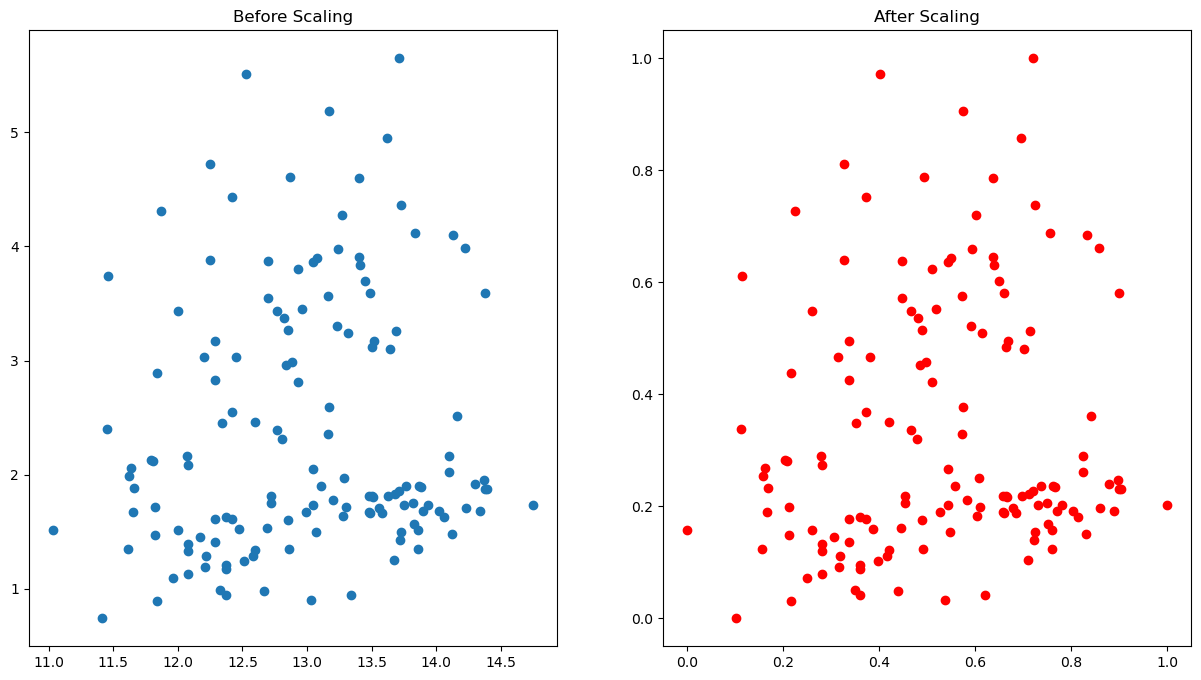

In [98]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(15,8))

ax1.scatter(X_train['Alcohol'],X_train['Malic acid'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'], color='red')
ax2.set_title('After Scaling')

# Distribution of Alcohol alone

Text(0.5, 1.0, 'Alcohol distribution after scaling')

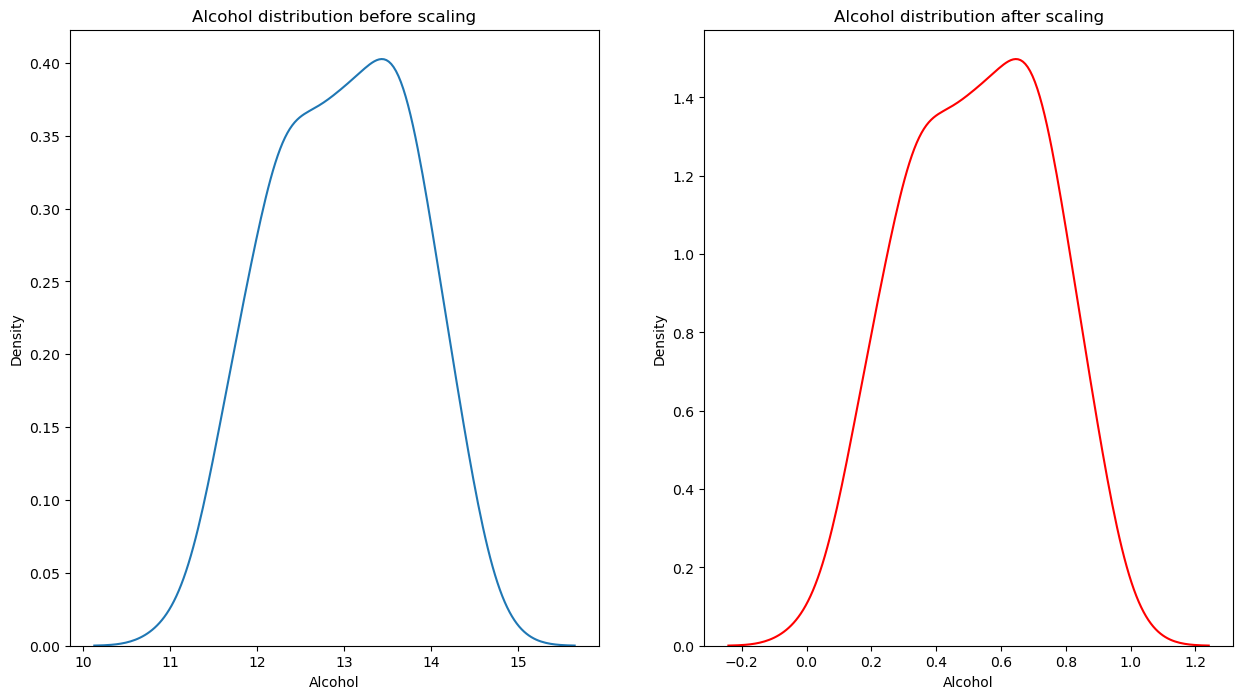

In [99]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(15,8))

sns.kdeplot(X_train['Alcohol'], ax=ax1)
ax1.set_title('Alcohol distribution before scaling')
sns.kdeplot(X_train_scaled['Alcohol'],color='red', ax=ax2)
ax2.set_title('Alcohol distribution after scaling')

# Distribution of Malic Acid 

Text(0.5, 1.0, 'Distribution of Malic acid after scaling')

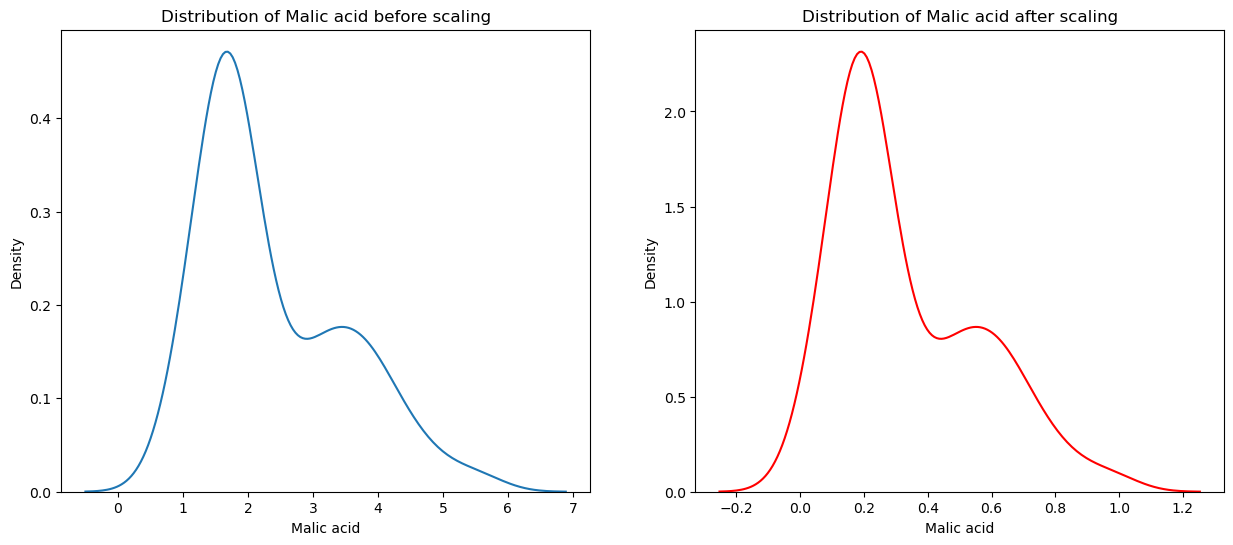

In [100]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(15,6))

sns.kdeplot(X_train['Malic acid'], ax=ax1)
ax1.set_title('Distribution of Malic acid before scaling')
sns.kdeplot(X_train_scaled['Malic acid'],color='red' ,ax=ax2)
ax2.set_title('Distribution of Malic acid after scaling')

# Distribution of Alcohol and Malic acid using pdf

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

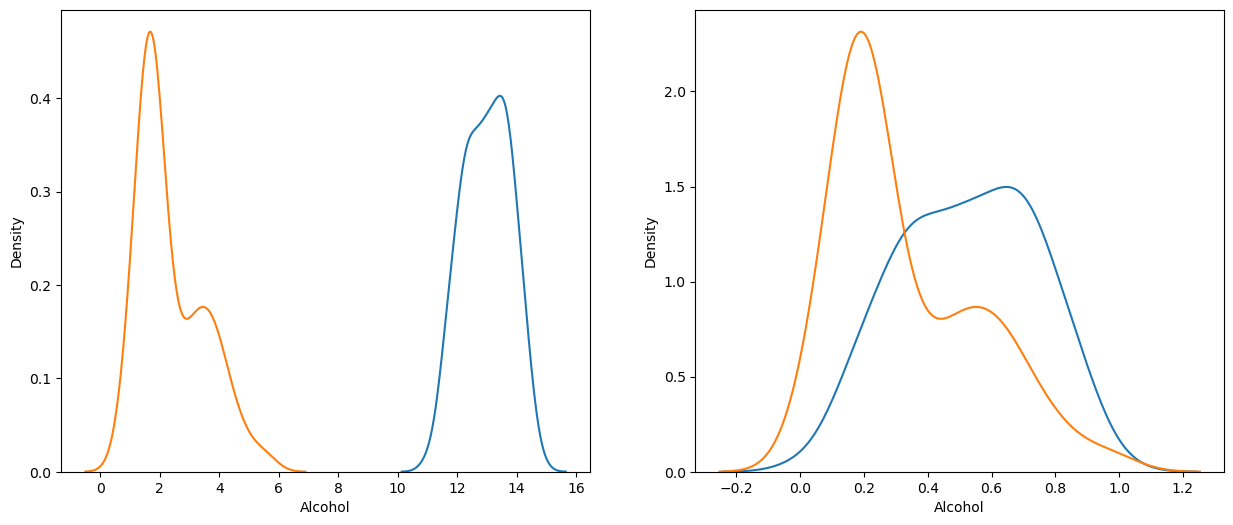

In [101]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(15,6))

sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)

In [102]:
df['Class label'].unique()

array([1, 2, 3], dtype=int64)

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
model=LogisticRegression()
model_scaled=LogisticRegression()

In [105]:
model.fit(X_train,y_train)
model_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [107]:
model.predict(X_test)
model_scaled.predict(X_test_scaled)

array([1, 2, 2, 1, 3, 2, 1, 3, 2, 2, 1, 3, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 3, 3, 1, 2], dtype=int64)

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
accuracy_score(y_test, model.predict(X_test))

0.7222222222222222

In [110]:
accuracy_score(y_test, model_scaled.predict(X_test_scaled))

0.75

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
model=DecisionTreeClassifier()
model_scalar=DecisionTreeClassifier()

In [113]:
model.fit(X_train,y_train)
model_scalar.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [115]:
model.predict(X_test)
model_scalar.predict(X_test_scaled)

array([1, 3, 2, 1, 3, 2, 1, 2, 2, 2, 3, 3, 1, 2, 3, 2, 2, 1, 2, 1, 2, 1,
       3, 3, 2, 3, 2, 2, 2, 3, 1, 1, 2, 1, 3, 1], dtype=int64)

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
accuracy_score(y_test, model.predict(X_test))

0.8055555555555556

In [118]:
accuracy_score(y_test, model_scalar.predict(X_test_scaled))

0.8055555555555556

In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
confusion_matrix(y_test, model.predict(X_test))

array([[11,  1,  2],
       [ 0, 13,  3],
       [ 0,  1,  5]], dtype=int64)

In [121]:
confusion_matrix(y_test, model_scalar.predict(X_test_scaled))

array([[11,  1,  2],
       [ 0, 13,  3],
       [ 0,  1,  5]], dtype=int64)

In [122]:
from sklearn.metrics import classification_report

In [124]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.79      0.88        14
           2       0.87      0.81      0.84        16
           3       0.50      0.83      0.62         6

    accuracy                           0.81        36
   macro avg       0.79      0.81      0.78        36
weighted avg       0.86      0.81      0.82        36



In [125]:
print(classification_report(y_test, model_scalar.predict(X_test_scaled)))

              precision    recall  f1-score   support

           1       1.00      0.79      0.88        14
           2       0.87      0.81      0.84        16
           3       0.50      0.83      0.62         6

    accuracy                           0.81        36
   macro avg       0.79      0.81      0.78        36
weighted avg       0.86      0.81      0.82        36

